In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc import MCMC
import seaborn
import numpy as np
from parmed.topologyobjects import DihedralType
from simtk import unit
from torsionfit.toy_model import ToyModel
import torsionfit.sqlite_plus as db

Generate toy model that only allows 0 or 180 phases but allows all multiplicities to be on

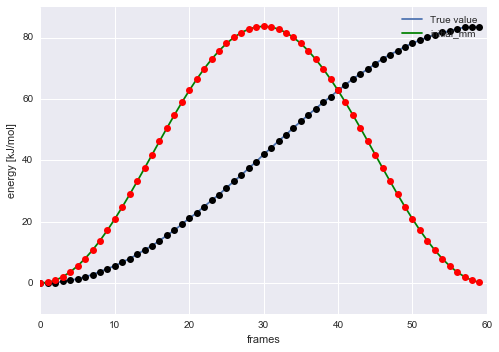

In [2]:
toy = ToyModel(true_value=DihedralType(10, 1, 180, 1, 1), initial_value=DihedralType(10, 2, 180, 1, 1), n_increments=30, decouple_n=True)
plt.plot(toy.synthetic_energy, label='True value')
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='g', label='initial_mm')
plt.plot(toy.scan_set.initial_mm, 'ko', color='r')
plt.legend()

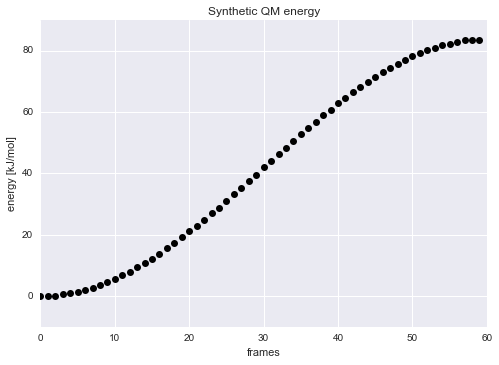

In [3]:
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.title('Synthetic QM energy')
plt.savefig('toy_QM_energy.pdf')

In [4]:
# sample
sampler = MCMC(toy.model.pymc_parameters, db=db, dbname='discrete_decoupled_n.sqlite')
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 543.2 sec

In [5]:
print('true value')
print(toy.true_value)
print('initial value')
print(toy.initial_value)
print toy.model.pymc_parameters['CG331_CG321_CG321_CG331_1_K'].value

true value
<DihedralTypes [<DihedralType; phi_k=10.000, per=1, phase=180.000,  scee=1.000, scnb=1.000>]>
initial value
<DihedralType; phi_k=0.194, per=2, phase=0.000,  scee=1.000, scnb=1.000>
5.41938993161


With discrete phase proposals torsionfit does not gives a good fit even if all labels are off. 

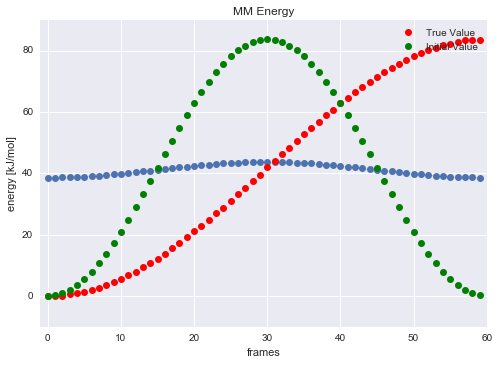

In [6]:
seaborn.tsplot(sampler.trace('mm_energy')[:], interpolate=False)
plt.plot(toy.synthetic_energy, 'o', color='r', label='True Value')
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy.scan_set.initial_mm, 'o', color='g', label='Initial Value')
plt.legend()
plt.savefig('toy_mm_energy_continous.pdf')

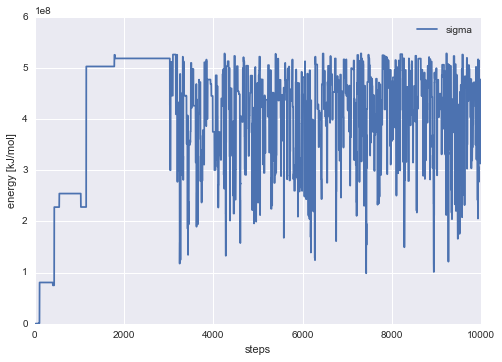

In [7]:
plt.plot(np.exp(sampler.trace('sigma')[9:]), label='sigma')
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')
plt.savefig('sigma_continous.pdf')

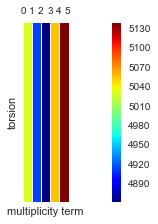

In [8]:
import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, 0, 'random.png')
plt.savefig('multiplicity_continous.pdf')

In [9]:
print('true value')
print(toy.true_value)
print('initial value')
print(toy.initial_value)

true value
<DihedralTypes [<DihedralType; phi_k=10.000, per=1, phase=180.000,  scee=1.000, scnb=1.000>]>
initial value
<DihedralType; phi_k=0.194, per=2, phase=0.000,  scee=1.000, scnb=1.000>


From the traces of each parameters, you can see how the phases are stuck at 0 and most Ks are random. 

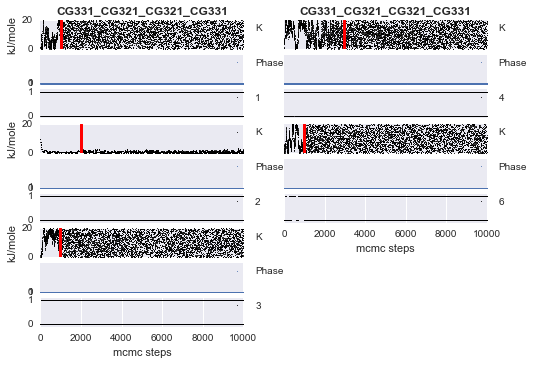

In [10]:
plots.trace_plots('CG331_CG321_CG321_CG331', sampler, markersize=2.0)